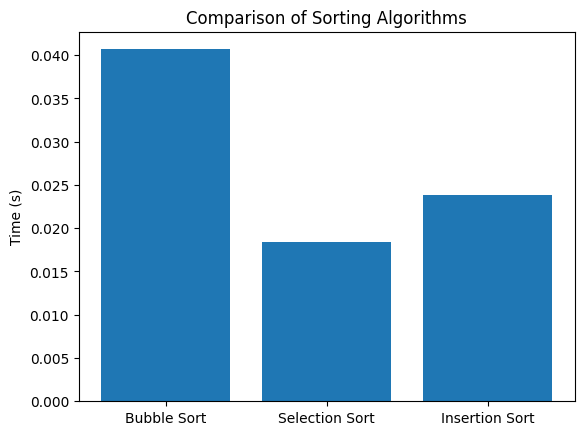

In [9]:
# question 1
import random
import time
import matplotlib.pyplot as plt

# Generate 1000 random numbers between 1 and 10000
random_numbers = [random.randint(1, 10000) for _ in range(1000)]

# Define the sorting algorithms to compare
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# Measure the time taken for each sorting algorithm
start_time = time.time()
sorted_numbers_bubble = bubble_sort(random_numbers.copy())
bubble_sort_time = time.time() - start_time

start_time = time.time()
sorted_numbers_selection = selection_sort(random_numbers.copy())
selection_sort_time = time.time() - start_time

start_time = time.time()
sorted_numbers_insertion = insertion_sort(random_numbers.copy())
insertion_sort_time = time.time() - start_time

# Plot the time taken for each sorting algorithm
plt.bar(['Bubble Sort', 'Selection Sort', 'Insertion Sort'], [bubble_sort_time, selection_sort_time, insertion_sort_time])
plt.ylabel('Time (s)')
plt.title('Comparison of Sorting Algorithms')
plt.show()

In [10]:
# question 2
import heapq

# Input sorted lists
lists = [
    [10, 20, 30, 40],
    [15, 25, 35],
    [27, 29, 37, 48, 93],
    [32, 33]
]

# Initialize an empty heap and output list
heap = []
output = []

# Initialize an index for each list to keep track of the current element
index = [0] * len(lists)

# Push the first element from each list into the heap
for i, l in enumerate(lists):
    if index[i] < len(l):
        heapq.heappush(heap, (l[index[i]], i))

# Merge the lists
while heap:
    val, list_index = heapq.heappop(heap)
    output.append(val)
    index[list_index] += 1
    if index[list_index] < len(lists[list_index]):
        heapq.heappush(heap, (lists[list_index][index[list_index]], list_index))

# Print the merged list
print(output)

[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


In [11]:
# question 3
import heapq

def find_k_largest_elements(arr, k):
    # Use a min-heap to keep track of the K largest elements
    heap = []
    
    # Iterate over the array
    for num in arr:
        # If heap has fewer than K elements, add the current element
        if len(heap) < k:
            heapq.heappush(heap, num)
        else:
            # If the current element is larger than the smallest element in the heap
            # Replace the smallest element with the current element
            if num > heap[0]:
                heapq.heappop(heap)
                heapq.heappush(heap, num)
    
    # Return the K largest elements in the heap
    return heap

# Example usage
arr = [7, 10, 4, 3, 20, 15]
k = 3
result = find_k_largest_elements(arr, k)
print(result)


[10, 20, 15]


In [12]:
 # question 4
def max_activities(activities):
    # Sort activities by finishing time
    activities.sort(key=lambda x: x[1])
    
    # Initialize variables
    prev_finish_time = 0
    max_activities_count = 0
    
    # Iterate over activities
    for activity in activities:
        start_time, finish_time = activity
        # If the current activity can be performed
        if start_time >= prev_finish_time:
            max_activities_count += 1
            prev_finish_time = finish_time
    
    return max_activities_count

# Example usage
activities = [(1, 2), (3, 4), (0, 6), (5, 7), (8, 9), (5, 9)]
print(max_activities(activities))

4


In [13]:
# question 5
def merge_intervals(intervals):
    # Sort intervals based on start time
    intervals.sort(key=lambda x: x[0])
    
    # Initialize an empty stack
    stack = []
    
    # Push the first interval onto the stack
    stack.append(intervals[0])
    
    # Merge overlapping intervals
    for interval in intervals[1:]:
        if interval[0] <= stack[-1][1]:
            # Merge intervals
            stack[-1] = (stack[-1][0], max(stack[-1][1], interval[1]))
        else:
            # Push non-overlapping interval onto the stack
            stack.append(interval)
    
    return stack

# Example usage
intervals = [(1, 4), (2, 5), (7, 8), (6, 9)]
merged_intervals = merge_intervals(intervals)
print(merged_intervals)

[(1, 5), (6, 9)]
